In [11]:
import gymnasium as gym
from vectorhash import build_vectorhash_architecture
from shifts import RatShift
from smoothing import RatSLAMSmoothing
from miniworld.params import DEFAULT_PARAMS
from miniworld_agent import MiniworldVectorhashAgent
import math
import torch
from graph_utils import plot_imgs_side_by_side
from matplotlib import pyplot as plt
from graph_utils import error_test
import copy
from preprocessing_cnn import GrayscaleAndFlattenPreprocessing


### vhash
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

shapes = [(5, 5, 5), (8, 8, 8)]
N = 10


def make_env():
    params = DEFAULT_PARAMS.copy().no_random()
    # [
    #     "MiniWorld-CollectHealth-v0",
    #     "MiniWorld-FourRooms-v0",
    #     "MiniWorld-Hallway-v0",
    #     "MiniWorld-Maze-v0",
    #     "MiniWorld-MazeS2-v0",
    #     "MiniWorld-MazeS3-v0",
    #     "MiniWorld-MazeS3Fast-v0",
    #     "MiniWorld-OneRoom-v0",
    #     "MiniWorld-OneRoomS6-v0",
    #     "MiniWorld-OneRoomS6Fast-v0",
    #     "MiniWorld-PickupObjects-v0",
    #     "MiniWorld-PutNext-v0",
    #     "MiniWorld-RoomObjects-v0",
    #     "MiniWorld-Sidewalk-v0",
    #     "MiniWorld-Sign-v0",
    #     "MiniWorld-TMaze-v0",
    #     "MiniWorld-TMazeLeft-v0",
    #     "MiniWorld-TMazeRight-v0",
    #     "MiniWorld-ThreeRooms-v0",
    #     "MiniWorld-WallGap-v0",
    #     "MiniWorld-YMaze-v0",
    #     "MiniWorld-YMazeLeft-v0",
    #     "MiniWorld-YMazeRight-v0",
    # ]
    env = gym.make(
        "MiniWorld-CollectHealth-v0",
        max_episode_steps=-1,
        params=params,
        domain_rand=False,
    )
    min_x = env.get_wrapper_attr("min_x")
    max_x = env.get_wrapper_attr("max_x")
    min_z = env.get_wrapper_attr("min_z")
    max_z = env.get_wrapper_attr("max_z")

    limits = torch.tensor([max_x - min_x, max_z - min_z, 2 * math.pi]).float()
    return env, limits


env, limits = make_env()
model = build_vectorhash_architecture(
    shapes,
    N_h=600,
    input_size=60 * 80,
    initalization_method="by_sparsity",
    limits=limits,
    device=device,
    shift=RatShift(),
    smoothing=RatSLAMSmoothing(device=device),
)


#### agent
agent = MiniworldVectorhashAgent(
    model, env, preprocessor=GrayscaleAndFlattenPreprocessing(device=device)
)

by_sparsity
module shapes:  [(5, 5, 5), (8, 8, 8)]
N_g     :  637
N_patts :  64000
N_h     :  600
info for each h directly after learning it
h max, min, mean tensor(5.8969, device='cuda:0') tensor(0., device='cuda:0') tensor(1.7130, device='cuda:0')
h_from_s max, min, mean tensor(5.8968, device='cuda:0') tensor(0., device='cuda:0') tensor(1.7130, device='cuda:0')
h_from_s_denoised max, min, mean tensor(2.0211, device='cuda:0') tensor(1.4123, device='cuda:0') tensor(1.7193, device='cuda:0')
avg nonzero/greaterzero h from book: tensor(529, device='cuda:0') tensor(529, device='cuda:0')
avg nonzero/greaterzero h from s: tensor(529, device='cuda:0') tensor(529, device='cuda:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='cuda:0') tensor(600, device='cuda:0')
mse/cosinesimilarity h from book and h from s tensor(1.0175e-10, device='cuda:0') tensor([1.], device='cuda:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.5206, device='cuda:0') tensor([0.8129], d

In [12]:
start_state = agent.vectorhash.scaffold.g
print('start state:', start_state)
print('grid limits:', agent.vectorhash.scaffold.grid_limits)
print('world limits:', limits)
print('scale factor:', agent.vectorhash.scaffold.scale_factor)

start state: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.,

In [13]:
begin = agent.get_true_pos(env)
end = begin + 1 / agent.vectorhash.scaffold.scale_factor
dist = torch.distributions.uniform.Uniform(low=begin, high=end)
samples = dist.sample((N,))
grid_states = agent.vectorhash.scaffold.scale_factor * (samples - begin)

In [14]:
print("samples:", samples)
print("grid states:", grid_states)

samples: tensor([[4.8828, 9.6440, 0.5606],
        [4.8133, 9.5349, 0.5786],
        [4.8060, 9.6467, 0.4692],
        [4.9001, 9.6470, 0.6023],
        [4.6226, 9.6775, 0.5862],
        [4.7716, 9.7144, 0.4543],
        [4.7097, 9.5715, 0.4844],
        [4.9573, 9.6976, 0.5242],
        [4.7440, 9.7319, 0.4726],
        [4.7892, 9.6141, 0.5042]], device='cuda:0')
grid states: tensor([[0.7198, 0.7658, 0.6991],
        [0.5459, 0.4930, 0.8138],
        [0.5277, 0.7724, 0.1171],
        [0.7630, 0.7734, 0.9647],
        [0.0692, 0.8496, 0.8624],
        [0.4416, 0.9418, 0.0225],
        [0.2871, 0.5845, 0.2141],
        [0.9059, 0.8998, 0.4677],
        [0.3728, 0.9856, 0.1391],
        [0.4857, 0.6910, 0.3405]], device='cuda:0')


info for each h directly after learning it
h max, min, mean 

tensor(5.8969, device='cuda:0') tensor(0., device='cuda:0') tensor(1.7130, device='cuda:0')
h_from_s max, min, mean tensor(5.8968, device='cuda:0') tensor(0., device='cuda:0') tensor(1.7130, device='cuda:0')
h_from_s_denoised max, min, mean tensor(2.0211, device='cuda:0') tensor(1.4123, device='cuda:0') tensor(1.7193, device='cuda:0')
avg nonzero/greaterzero h from book: tensor(529, device='cuda:0') tensor(529, device='cuda:0')
avg nonzero/greaterzero h from s: tensor(529, device='cuda:0') tensor(529, device='cuda:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='cuda:0') tensor(600, device='cuda:0')
mse/cosinesimilarity h from book and h from s tensor(1.3357e-11, device='cuda:0') tensor([1.], device='cuda:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.5206, device='cuda:0') tensor([0.8129], device='cuda:0')
mse/cosinesimilarity s and s from h from s tensor(0.0018, device='cuda:0') tensor([0.9962], device='cuda:0')
mse/cosinesimilarity s and s from

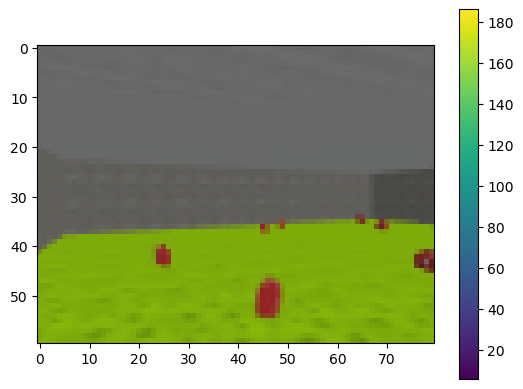

In [15]:
first_img, first_pos = agent._env_reset(env)
first_img, first_pos = agent._obs_postpreprocess(agent.env.step(4), 4)
m = plt.imshow(first_img)
plt.colorbar(m)
agent.vectorhash.store_memory(s=agent.preprocessor.encode(first_img))

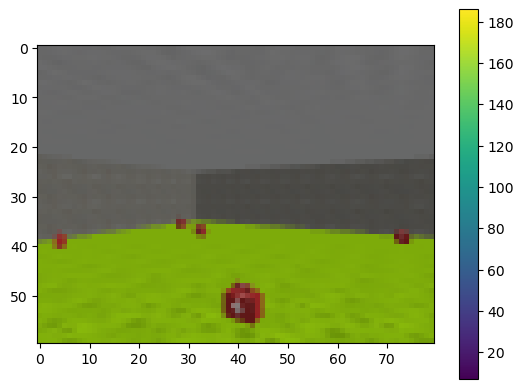

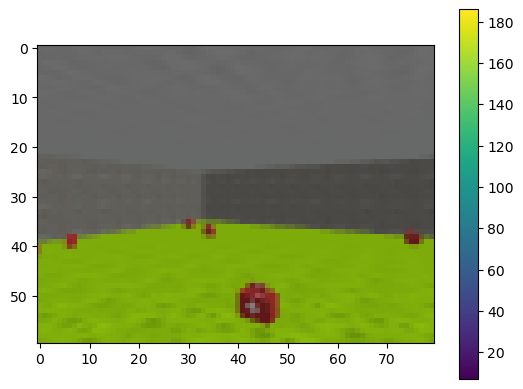

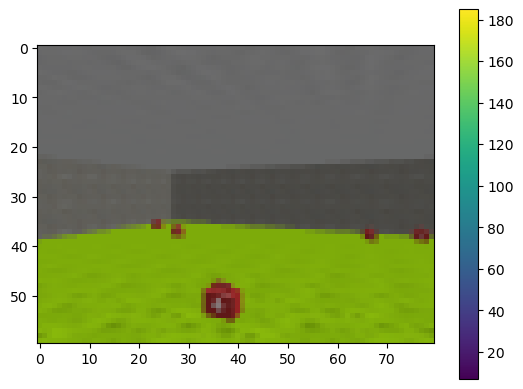

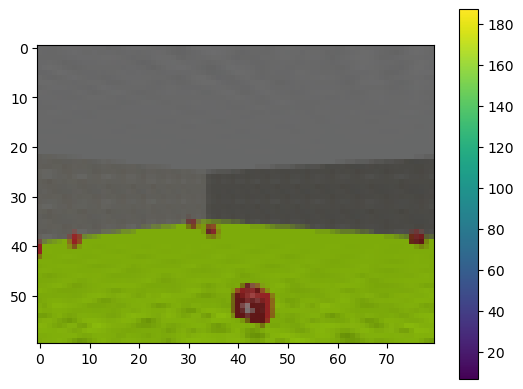

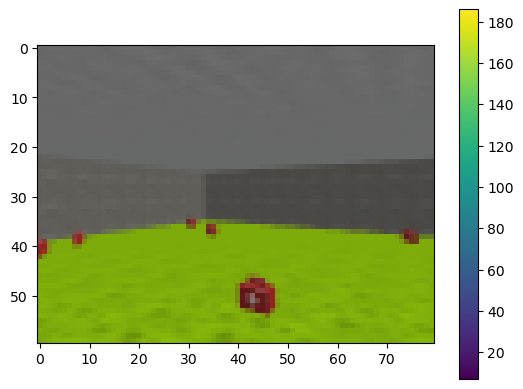

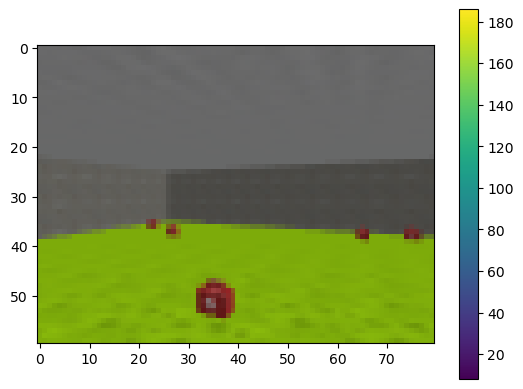

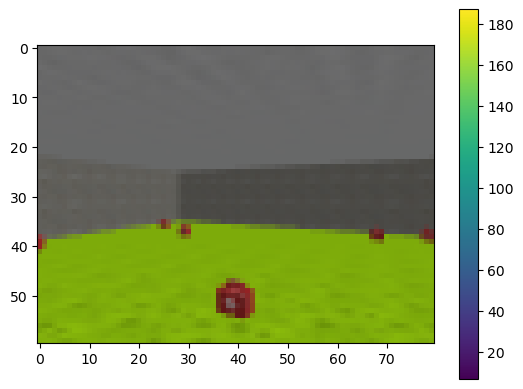

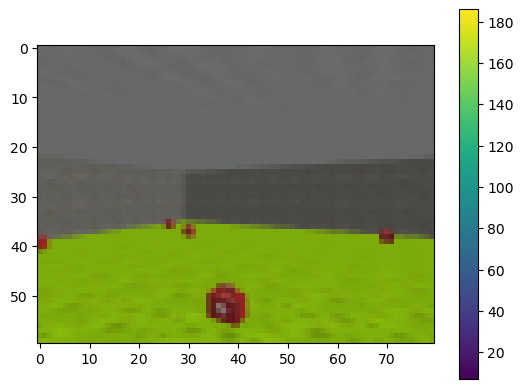

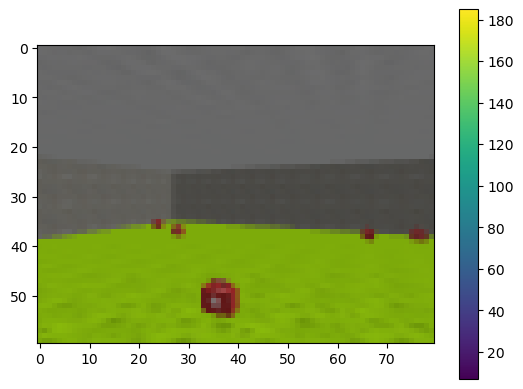

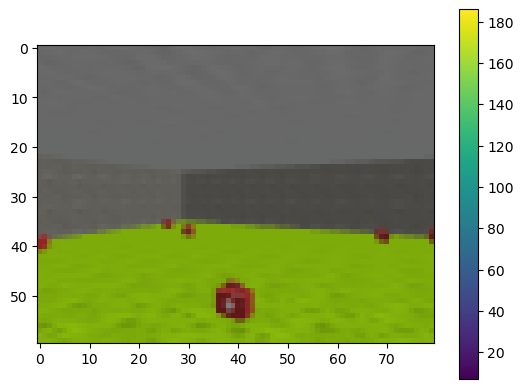

In [16]:
imgs = []
states = []
for sample in samples:
    pos = sample.cpu().numpy()
    agent.set_agent_pos(pos)
    img , _ = agent._obs_postpreprocess(agent.env.step(4), 4)
    obs = agent.preprocessor.encode(img)
    g = agent.vectorhash.scaffold.denoise(
        agent.vectorhash.scaffold.grid_from_hippocampal(
            agent.vectorhash.hippocampal_sensory_layer.hippocampal_from_sensory(obs)
        )
    )
    m = plt.imshow(img)
    plt.colorbar(m)
    plt.show()
    imgs.append(img)
    states.append(g)

Text(0.5, 0.98, 'probability mass in each distribution (no cnn)')

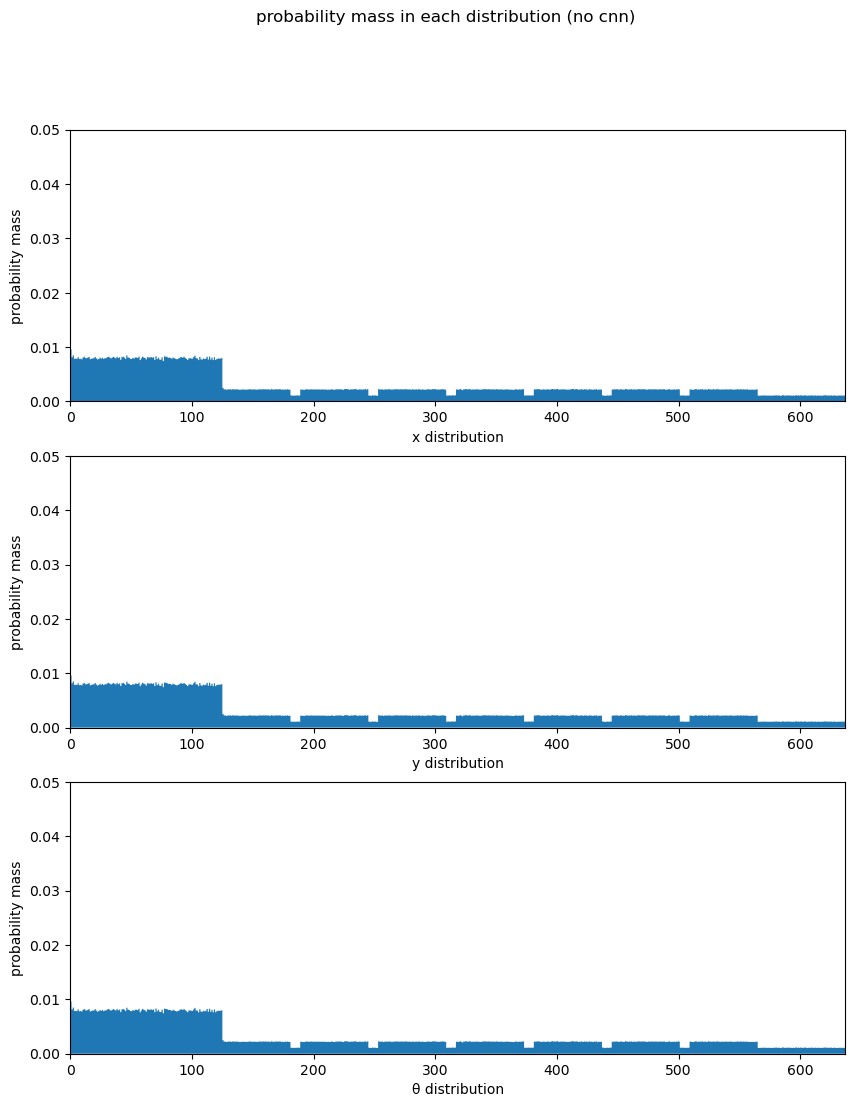

In [17]:
import matplotlib.pyplot as plt
from matplotlib import axes
from graph_utils import plot_probability_distribution_on_ax

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

plot_probability_distribution_on_ax(states[0][0].cpu(), axs[0])
plot_probability_distribution_on_ax(states[1][0].cpu(), axs[1])
plot_probability_distribution_on_ax(states[2][0].cpu(), axs[2])

for i in range(3):
  a: axes.Axes = axs[i]
  a.set_ylim(0, 0.05)
  a.set_xlim(0, len(states[0][0]))
  a.set_ylabel('probability mass')
  
axs[0].set_xlabel('x distribution')
axs[1].set_xlabel('y distribution')
axs[2].set_xlabel('θ distribution')

fig.suptitle('probability mass in each distribution (no cnn)')

In [18]:
errors = torch.zeros(N, 3)

scaffold_copy = copy.deepcopy(model.scaffold)
for i, state in enumerate(states):
  scaffold_copy.modules = scaffold_copy.modules_from_g(state[0])
  for d in range(3):
    errors[i, d] = error_test(0, scaffold_copy.expand_distribution(d))

Text(0.5, 0.98, 'probability mass in each distribution')

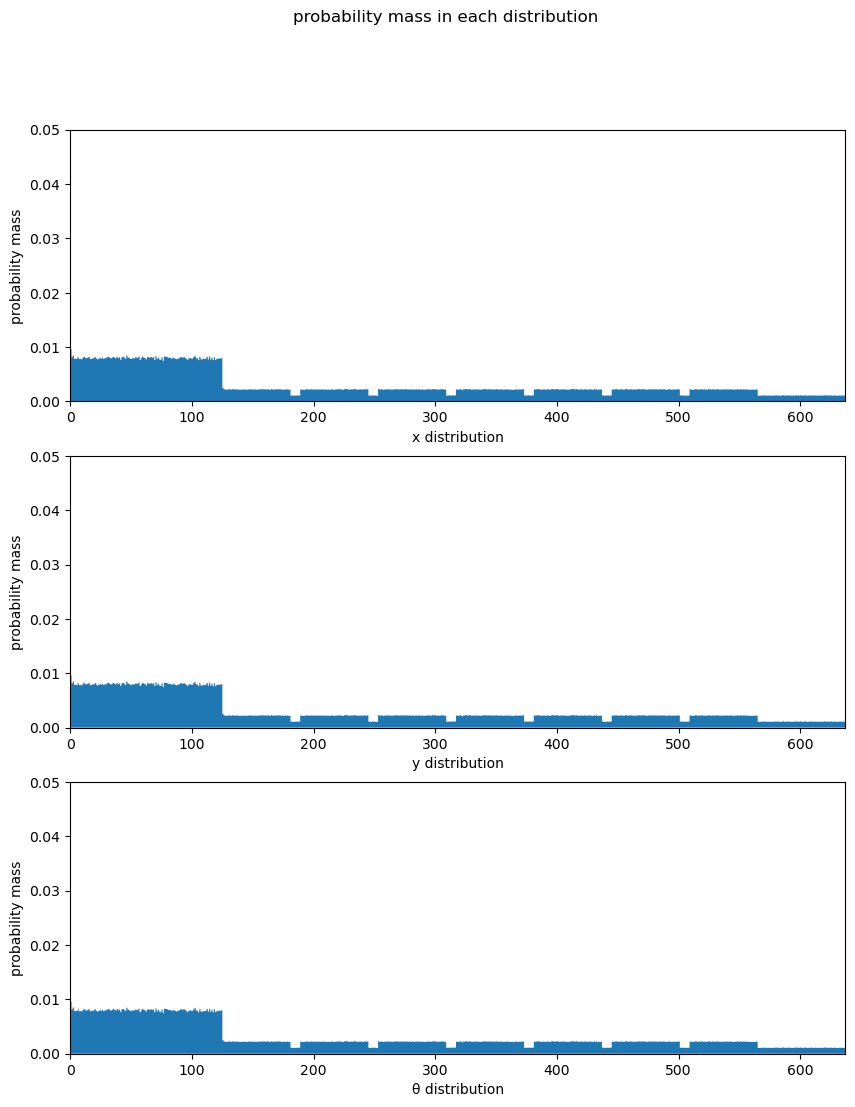

In [19]:
import matplotlib.pyplot as plt
from matplotlib import axes
from graph_utils import plot_probability_distribution_on_ax

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

plot_probability_distribution_on_ax(states[0][0].cpu(), axs[0])
plot_probability_distribution_on_ax(states[1][0].cpu(), axs[1])
plot_probability_distribution_on_ax(states[2][0].cpu(), axs[2])

for i in range(3):
  a: axes.Axes = axs[i]
  a.set_ylim(0, 0.05)
  a.set_xlim(0, len(states[0][0]))
  a.set_ylabel('probability mass')
  
axs[0].set_xlabel('x distribution')
axs[1].set_xlabel('y distribution')
axs[2].set_xlabel('θ distribution')

fig.suptitle('probability mass in each distribution')

In [20]:
print(errors)

tensor([[10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996],
        [10.0115, 10.0111,  9.9996]])
